# **Predicting Molecular Properties**

In the following notebook I hope to perform an inital exploratory data anaalysis of the datasests provided and represent the findings as clearly as possible

-----------------------------------------------------------------------------------------
Load in all the required dependancies

In [1]:
!pip install missingno 
!pip install cufflinks


In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import random

import plotly.plotly as plly
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import cufflinks

from tqdm import tqdm_notebook as tqdm

from matplotlib import pyplot as plt
%matplotlib inline

Read in all the data into relevant dataframes 

In [3]:
train = pd.read_csv("C:\\Users\\samir\\Desktop\\machineLearningPMP19\\train.csv")
test = pd.read_csv("C:\\Users\\samir\\Desktop\\machineLearningPMP19\\test.csv")
structures = pd.read_csv("C:\\Users\\samir\\Desktop\\machineLearningPMP19\\structures.csv")
scalar_coupling_contributions = pd.read_csv("C:\\Users\\samir\\Desktop\\machineLearningPMP19\\scalar_coupling_contributions.csv")
potential_energy = pd.read_csv("C:\\Users\\samir\\Desktop\\machineLearningPMP19\\potential_energy.csv")
mulliken_charges = pd.read_csv("C:\\Users\\samir\\Desktop\\machineLearningPMP19\\mulliken_charges.csv")
magnetic_shielding_tensors = pd.read_csv("C:\\Users\\samir\\Desktop\\machineLearningPMP19\\magnetic_shielding_tensors.csv")
dipole_moments = pd.read_csv("C:\\Users\\samir\\Desktop\\machineLearningPMP19\\dipole_moments.csv")

-----------------------------------------------------------------------
-----------------------------------------------------------------------
## ***Below we shall investigate the contence of each dataset***



-----------------------------------------------------------------------
-----------------------------------------------------------------------

**train**

-----------------------------------------------------------------------

In [4]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


* **id** coloumn gives the unique identitcation of the molecule and is used in the final submission format.        *(discrete)*
* **molecule_name** gives us the molecule name which is used in other datasets to refer to specific molecules.  *(discrete)*
* **atom_index_0** and **atom_index_1** are the two atoms of the molecule being considered.               *(discrete)*
* **type** the type of coupling occuring.              *(discrete)*
* **scalar_coupling_constant** is the value we aim to predict.        *(contineous)*

In [5]:
train.index


RangeIndex(start=0, stop=4658147, step=1)

There are 4,658,147 unique coupling interactions (are they all unique?)

------------------------------------------------------------------------

**Structures**

In [6]:
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


This dataset gives the position of each atom in each molecule, expressed in terms of its x,y,z position in a carteasian space

In [7]:
structures.index

RangeIndex(start=0, stop=2358657, step=1)

There are 2,358,657 atoms making up our molecules


------------------------------------------------------------------------

**Scalar coupling contributions**

In [8]:
scalar_coupling_contributions.head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013


* fc (Fermi contact contribution)  *(contineous)*
* sd (Spin dipolar contribution)  *(contineous)*
* Pso (Paramegnetic spin-orbit contribution)  *(contineous)*
* Dso (Diamagnetic spin-orbit contribution)   *(contineous)*

**the target variable (scalar_coupling_contribution) is the sum of the four above values**

In [9]:
scalar_coupling_contributions.index

RangeIndex(start=0, stop=4658147, step=1)

There are 4,658,147 entries equal to the training dataset as we would expect (this in some ways is just a more detailed breakdown)


---------------------------------------------------------------------------------------------------------------

**Potential Energy**

In [10]:
potential_energy.head()

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


This dataset gives us the overall potential energy of each molecule   *(contineous)*

In [11]:
potential_energy.index

RangeIndex(start=0, stop=85003, step=1)

From this data set we can see that there are 85,003 molecules we are working with (One would hope that they are all unique)

-------------------------------------------------------------------------------------------------------------------------

**Mulliken Charge**

In [12]:
mulliken_charges.head()

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


This dataset provides the mulliken charge of each atom in every molecule  *(contineous)*

In [13]:
mulliken_charges.index

RangeIndex(start=0, stop=1533537, step=1)

Unsure why there are 1,533,537 entires. Must investigate


----------------------------------------------------------------------------------------------

**Magnetic Shielding Tensor**

In [14]:
magnetic_shielding_tensors.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


contains the elements of the matrix making up the magnetic shielding tensor (Rank 1). Appears to be a three by three matrix  *(contineous)*

In [15]:
magnetic_shielding_tensors.index

RangeIndex(start=0, stop=1533537, step=1)

There are 1,533,537 entries, the same as the number for the mulliken charges. 


-------------------------------------------------------------------------------------------

**Dipole Moments**

In [16]:
dipole_moments.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [17]:
#dipole_moments.duplicated(keep =False) <------- indidating that all entries are unique

Gives the x, y, z components of the vector which represent the overall dipole moment of the molecule

In [18]:
dipole_moments.index


RangeIndex(start=0, stop=85003, step=1)

There are 85,003 entries corresponding exactly as we would expect to the number of molecules present

# Cycle Two #
----

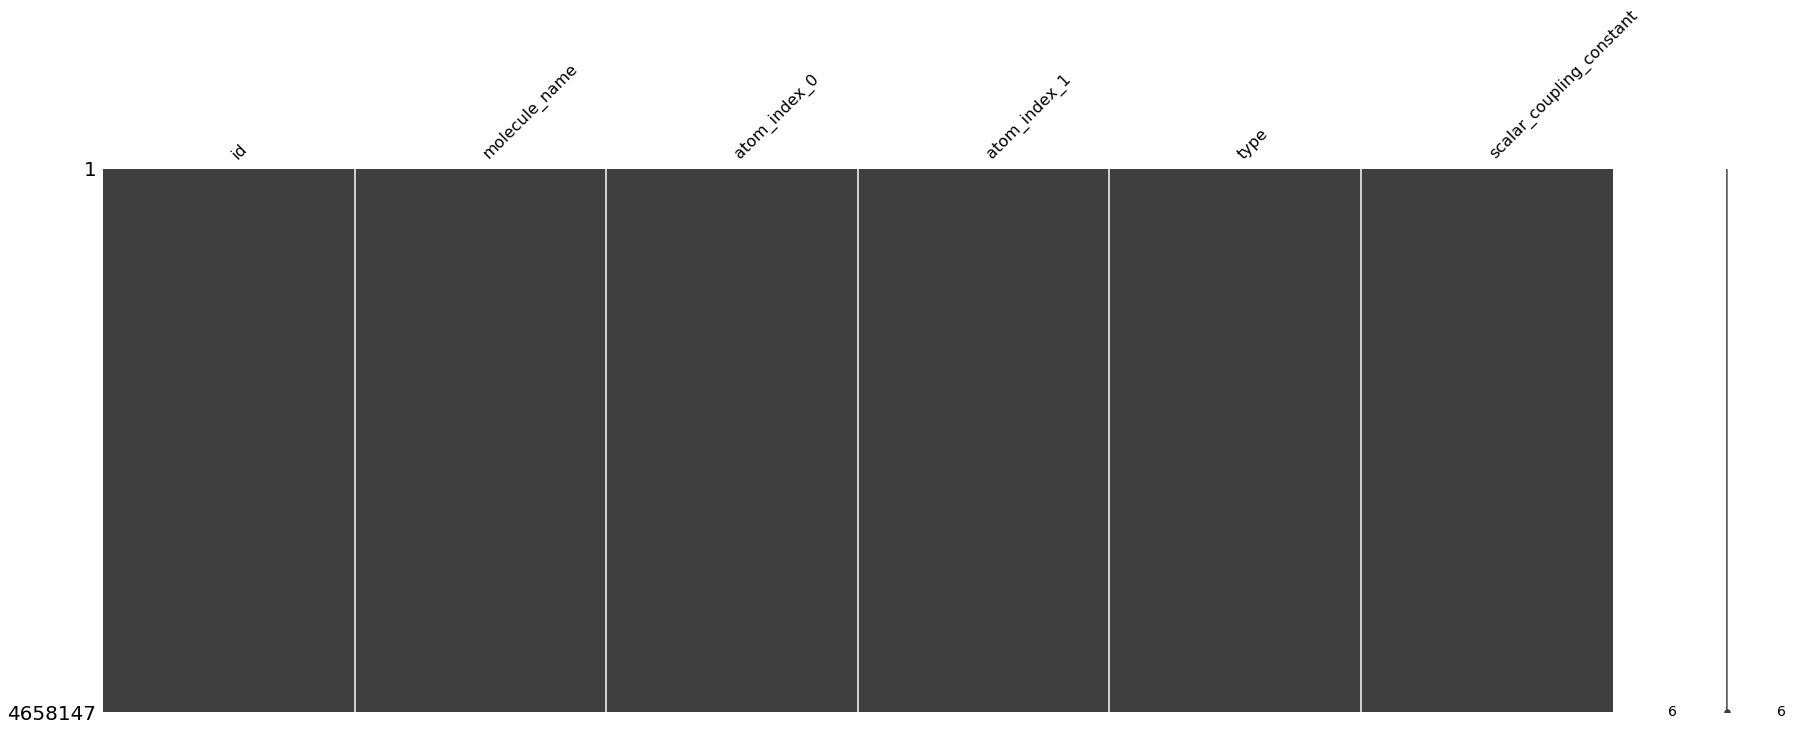

In [19]:
msno.matrix(train, figsize = (30,10))

From the above we can see that there is no missing data in the train dataset 

A brief breakdown

--------------------------------------

In [20]:
print(f'There are {train.shape[0]} rows in the training data')
print(f'There are {test.shape[0]} rows in the test data')

print(f"There are {train['molecule_name'].nunique()} unique molecules in the training data")
print(f"There are {test['molecule_name'].nunique()} unique molecules in the test data")
print(f"There are {train['atom_index_0'].nunique()} unique atoms in the training data")
print(f"There are {train['type'].nunique()} unique atoms in the training data")

There are 4658147 rows in the training data
There are 2505542 rows in the test data
There are 85003 unique molecules in the training data
There are 45772 unique molecules in the test data
There are 29 unique atoms in the training data
There are 8 unique atoms in the training data


--------------------------------------------------------------------------------------

 **This concludes the inital breakdown of the data**

--------------------------------------------------------------------------------------

### **A closer look at the train.csv data set**


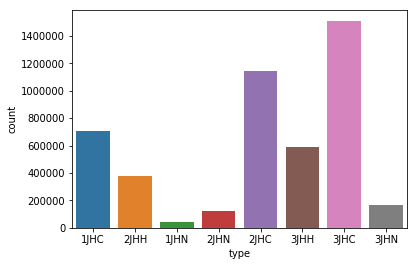

In [21]:
sns.countplot(x="type", data=train)

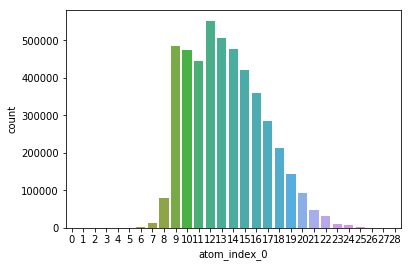

In [22]:
sns.countplot(x="atom_index_0", data=train)

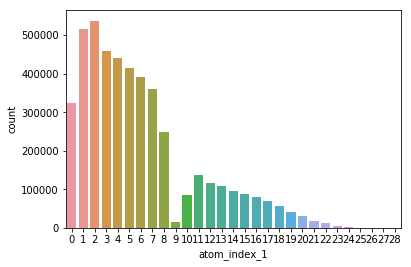

In [23]:
sns.countplot(x="atom_index_1", data=train)

In [24]:
train_discrete = train
train_discrete['scalar_coupling_constant'] = pd.cut(train['scalar_coupling_constant'], 10) 

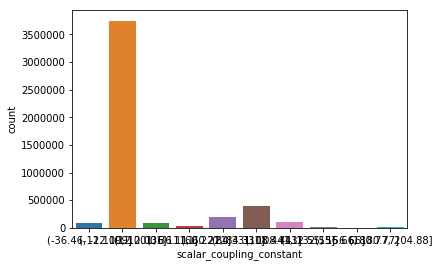

In [25]:
sns.countplot(x="scalar_coupling_constant", data=train_discrete)

In [26]:
train_discrete.head()



,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,"(84.331, 108.441]"
1,1,dsgdb9nsd_000001,1,2,2JHH,"(-12.109, 12.001]"
2,2,dsgdb9nsd_000001,1,3,2JHH,"(-12.109, 12.001]"
3,3,dsgdb9nsd_000001,1,4,2JHH,"(-12.109, 12.001]"
4,4,dsgdb9nsd_000001,2,0,1JHC,"(84.331, 108.441]"


In [27]:
#sns.countplot(x="scalar_coupling_constant", data=train)

The above worked and then did not, not sure what happened.
This randomly works then doesnt.
Works when the kernel is newly loaded


--------------

# Cycle Three #


    

Merging extra bits of data into the main training dataframe


In [28]:
train = pd.merge(train, scalar_coupling_contributions, how = 'left', left_on = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'],
            right_on = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])

In [29]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,fc,sd,pso,dso
0,0,dsgdb9nsd_000001,1,0,1JHC,"(84.331, 108.441]",83.0224,0.254579,1.25862,0.272010
1,1,dsgdb9nsd_000001,1,2,2JHH,"(-12.109, 12.001]",-11.0347,0.352978,2.85839,-3.433600
2,2,dsgdb9nsd_000001,1,3,2JHH,"(-12.109, 12.001]",-11.0325,0.352944,2.85852,-3.433870
3,3,dsgdb9nsd_000001,1,4,2JHH,"(-12.109, 12.001]",-11.0319,0.352934,2.85855,-3.433930
4,4,dsgdb9nsd_000001,2,0,1JHC,"(84.331, 108.441]",83.0222,0.254585,1.25861,0.272013


In [30]:
pd.concat(objs=[train['scalar_coupling_constant'],scalar_coupling_contributions['fc']],axis=1)


,scalar_coupling_constant,fc
0,"(84.331, 108.441]",83.022400
1,"(-12.109, 12.001]",-11.034700
2,"(-12.109, 12.001]",-11.032500
3,"(-12.109, 12.001]",-11.031900
4,"(84.331, 108.441]",83.022200
5,"(-12.109, 12.001]",-11.031700
6,"(-12.109, 12.001]",-11.032400
7,"(84.331, 108.441]",83.024100
8,"(-12.109, 12.001]",-11.031900
9,"(84.331, 108.441]",83.024300


from the above data is it is possible to use an intermediate model to predict values for fc for use in a final, better model


----------

## An attempt to find out which atoms are bonded together ##

input : x,y,z coordinates and covalent radius
output : list of atom_indexes of the other atoms that it is bonded to.

The code below associates each atoms with an electronegativity and a bond radius. 

In [31]:
atomic_radius = {'H' :0.38, 'C' :0.77, 'N' :0.75, 'O' :0.73, 'F':0.71}  #values from wikipedia

fudge_factor = 0.05  # to reduce false negatives (ensure we do not claim that there a bonds where there arent any.)
atomic_radius = {k:v + fudge_factor for k,v in atomic_radius.items()}
print(atomic_radius)

electronegativity = {'H' :2.2, 'C' :2.55, 'N' :3.04, 'O' :3.44, 'F' :3.98}

#structures = pd.read_csv(STRUCTURES_CSV, dtype={'atom_index': np.int8})

atoms = structures['atom'].values
atoms_en = [electronegativity[x] for x in tqdm(atoms)]
atoms_rad = [atomic_radius[x] for x in tqdm(atoms)]

structures['EN'] = atoms_en
structures['rad'] = atoms_rad

display(structures.head())
print (atoms)

{'H': 0.43, 'C': 0.8200000000000001, 'N': 0.8, 'O': 0.78, 'F': 0.76}


,molecule_name,atom_index,atom,x,y,z,EN,rad
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001,2.55,0.82
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976,2.20,0.43
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277,2.20,0.43
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644,2.20,0.43
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397,2.20,0.43


['C' 'H' 'H' ... 'H' 'H' 'H']


Moving on to calculate the chemical bonds

In [32]:
i_atom = structures['atom_index'].values
p = structures[['x', 'y', 'z']].values
p_compare = p
m = structures['molecule_name'].values
m_compare = m
r = structures['rad'].values
r_compare = r

source_row = np.arange(len(structures))
max_atoms = 28

bonds = np.zeros((len(structures)+1, max_atoms+1), dtype=np.int8)
bond_dists = np.zeros((len(structures)+1, max_atoms+1), dtype=np.float32)

print('Calculating bonds')

for i in tqdm(range(max_atoms-1)):
    p_compare = np.roll(p_compare, -1, axis=0)
    m_compare = np.roll(m_compare, -1, axis=0)
    r_compare = np.roll(r_compare, -1, axis=0)
    
    mask = np.where(m == m_compare, 1, 0) #Are we still comparing atoms in the same molecule?
    dists = np.linalg.norm(p - p_compare, axis=1) * mask
    r_bond = r + r_compare
    
    bond = np.where(np.logical_and(dists > 0.0001, dists < r_bond), 1, 0)
    
    source_row = source_row
    target_row = source_row + i + 1 #Note: Will be out of bounds of bonds array for some values of i
    target_row = np.where(np.logical_or(target_row > len(structures), mask==0), len(structures), target_row) #If invalid target, write to dummy row
    
    source_atom = i_atom
    target_atom = i_atom + i + 1 #Note: Will be out of bounds of bonds array for some values of i
    target_atom = np.where(np.logical_or(target_atom > max_atoms, mask==0), max_atoms, target_atom) #If invalid target, write to dummy col
    
    bonds[(source_row, target_atom)] = bond
    bonds[(target_row, source_atom)] = bond
    bond_dists[(source_row, target_atom)] = dists
    bond_dists[(target_row, source_atom)] = dists

bonds = np.delete(bonds, axis=0, obj=-1) #Delete dummy row
bonds = np.delete(bonds, axis=1, obj=-1) #Delete dummy col
bond_dists = np.delete(bond_dists, axis=0, obj=-1) #Delete dummy row
bond_dists = np.delete(bond_dists, axis=1, obj=-1) #Delete dummy col

print('Counting and condensing bonds')

bonds_numeric = [[i for i,x in enumerate(row) if x] for row in tqdm(bonds)]
bond_lengths = [[dist for i,dist in enumerate(row) if i in bonds_numeric[j]] for j,row in enumerate(tqdm(bond_dists))]
bond_lengths_mean = [ np.mean(x) for x in bond_lengths]
bond_lengths_std = [ np.std(x) for x in bond_lengths]
n_bonds = [len(x) for x in bonds_numeric]

#bond_data = {'bond_' + str(i):col for i, col in enumerate(np.transpose(bonds))}
#bond_data.update({'bonds_numeric':bonds_numeric, 'n_bonds':n_bonds})

bond_data = {'n_bonds':n_bonds, 'bond_lengths_mean': bond_lengths_mean,'bond_lengths_std':bond_lengths_std }
bond_df = pd.DataFrame(bond_data)
structures = structures.join(bond_df)
display(structures.head(20))

NameError: name 'np' is not defined